In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from matplotlib.axes import Axes  # noqa
from matplotlib.figure import Figure  # noqa
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [2]:
# @formatter:off
%matplotlib inline
# @formatter:on

In [3]:
plt.style.use('science')
sns.set_theme()

In [6]:
plt.rcParams['figure.figsize'] = (8, 4)

In [7]:
df: pd.DataFrame = pd.read_csv('data/Mall_Customers.csv')
df = df.rename(columns={
    'CustomerID': 'customer_id',
    'Genre': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score',
})
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


В датасете отсутствуют отсутствующие значения:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Исследуем зависимость между признаками `annual_income` и `spending_score` с помощью визуализации:

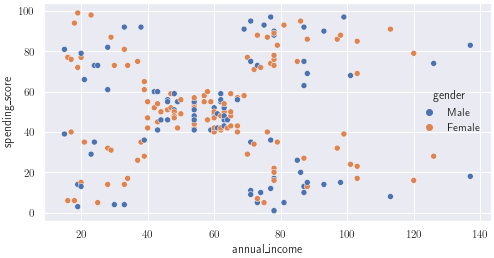

In [17]:
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='gender');

123

_Дополнительно, можно заметить, что пол не привносит никакой информации, не образуя видимой взаимосвязи ни с одним из рассматриваемых параметров. Т.е. можно сделать, что степень трат и величина дохода никак не зависят от пола._

In [ ]:
X = df[['age', 'annual_income', 'spending_score']]

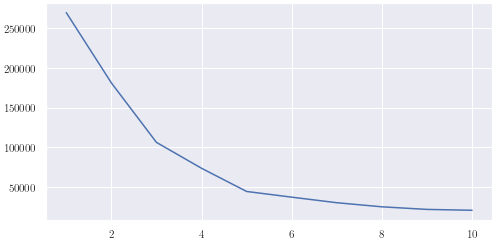

In [12]:
n_clusters = np.arange(1, 11, dtype=int)
wcss = []  # минимизация внутри кластерной суммы квадратов
for n in n_clusters:
    k_means = KMeans(n_clusters=n, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

sns.lineplot(x=n_clusters, y=wcss);

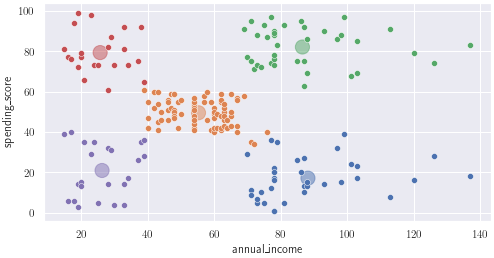

In [188]:
k_means = KMeans(n_clusters=5, random_state=0)
y_means = k_means.fit_predict(X)

fig, ax = plt.subplots()

ax.scatter(
    x=k_means.cluster_centers_[:, 0],
    y=k_means.cluster_centers_[:, 1],
    c=sns.color_palette(n_colors=k_means.n_clusters),
    s=200,
    alpha=0.5,
)

for i in range(k_means.n_clusters):
    sns.scatterplot(data=X[y_means == i], x='annual_income', y='spending_score', ax=ax)

In [189]:
X_ = df[['age', 'spending_score']]

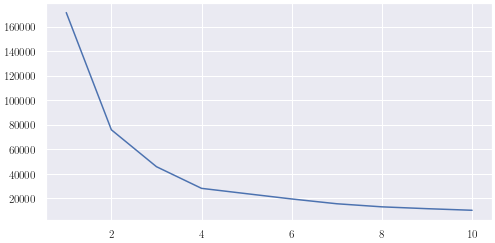

In [190]:
n_clusters = np.arange(1, 11, dtype=int)
wcss = []  # минимизация внутри кластерной суммы квадратов
for n in n_clusters:
    k_means = KMeans(n_clusters=n, random_state=0)
    k_means.fit(X_)
    wcss.append(k_means.inertia_)

sns.lineplot(x=n_clusters, y=wcss);

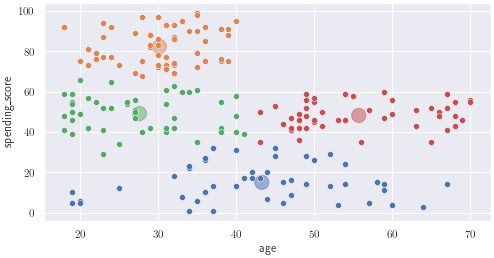

In [191]:
k_means_ = KMeans(n_clusters=4, random_state=0)
y_means = k_means_.fit_predict(X_)

fig, ax = plt.subplots()

ax.scatter(
    x=k_means_.cluster_centers_[:, 0],
    y=k_means_.cluster_centers_[:, 1],
    c=sns.color_palette(n_colors=k_means_.n_clusters),
    s=200,
    alpha=0.5,
)

for i in range(k_means_.n_clusters):
    sns.scatterplot(data=X_[y_means == i], x='age', y='spending_score', ax=ax)

## 3d

In [201]:
X__ = df[['age', 'annual_income', 'spending_score']]

In [202]:
k_means_ = KMeans(n_clusters=6, random_state=0)
y_means = k_means_.fit_predict(X__)

In [287]:
xs = X__[y_means == 0]
ys = X__[y_means == 1]
zs = X__[y_means == 2]

colors = sns.color_palette(n_colors=k_means.n_clusters)

data = [go.Scatter3d(
    x=k_means_.cluster_centers_[:, 0],
    y=k_means_.cluster_centers_[:, 1],
    z=k_means_.cluster_centers_[:, 2],
    mode='markers',
    marker={'size': 8, 'color': colors},
)]
for i in range(k_means_.n_clusters):
    data.append(go.Scatter3d(
        x=X__.loc[y_means == i, 'age'],
        y=X__.loc[y_means == i, 'annual_income'],
        z=X__.loc[y_means == i, 'spending_score'],
        mode='markers',
        marker={'size': 4, 'color': colors[i]},
        name=i,
    ))

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(xaxis_title='age', yaxis_title='annual income', zaxis_title='spending score'),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [407]:
from sklearn.model_selection import ShuffleSplit

param_grid = [{
    'n_clusters': np.arange(2, 20)
}]

search = GridSearchCV(
    KMeans(),
    param_grid,
    scoring={
        'silhouette_score': metrics.make_scorer(metrics.silhouette_score),
        'calinski_harabasz_score': metrics.make_scorer(metrics.calinski_harabasz_score),
    },
    refit='silhouette_score',
    cv=ShuffleSplit(n_splits=2, test_size=1, random_state=0),
    verbose=4,
    n_jobs=4,
    return_train_score=True,
)

In [423]:
search.fit(X__, X__);

Fitting 2 folds for each of 18 candidates, totalling 36 fits


d:\it\coding\github projects\my-university\iii курс\(python) технологии анализа данных и машинного обучения\venv\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



In [424]:
score_1 = 'mean_train_calinski_harabasz_score'
score_2 = 'mean_train_silhouette_score'

report = pd.DataFrame(search.cv_results_)
report = report[['mean_fit_time', 'mean_score_time', 'param_n_clusters', score_2, score_1]]

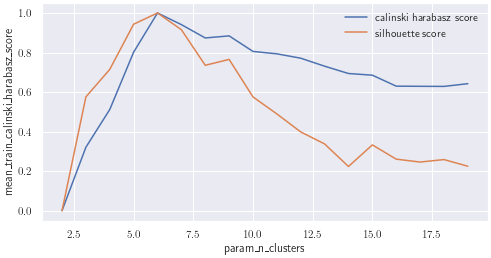

In [425]:
from sklearn.preprocessing import MinMaxScaler

data = report.copy()
data.loc[:, [score_1, score_2]] = MinMaxScaler().fit_transform(data[[score_1, score_2]])

ax = sns.lineplot(data=data, x='param_n_clusters', y=score_1)
sns.lineplot(data=data, x='param_n_clusters', y=score_2, ax=ax)
ax.legend(['calinski harabasz score', 'silhouette score']);